In [4]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

df_start = pd.read_excel('./data/crimes-et-delits-enregistres-par-les-services-de-gendarmerie-et-de-police-depuis-2012.xlsx', sheet_name=11)
df_start.rename(columns={"Année 2012 - compagnies de gendarmerie": "ID", "Départements": "CrimeType"}, inplace=True)
df_start['Annee'] = 2012

In [5]:
# Load the sheets after 2012
for i in range(12,17):
    df = pd.read_excel('./data/crimes-et-delits-enregistres-par-les-services-de-gendarmerie-et-de-police-depuis-2012.xlsx', sheet_name=i)
    year = 2001 + i    
    col1 = "Année {} - compagnies de gendarmerie".format(2001+i)
    df.rename(columns={col1: "ID", "Départements": "CrimeType"}, inplace=True)
    df['Annee'] = year    
    df_start = pd.concat([df_start, df], ignore_index=True)

In [6]:
df_start.fillna(0, inplace=True)

In [7]:
indexName = df_start['Annee']
annee = indexName.drop_duplicates() 
anneeFrame = annee.to_frame() 
sumCrime = []
anneeFrame['Total'] = 0
for i in annee:
    dfAnnee = df_start.loc[df_start['Annee'] == i]
    dfTest = dfAnnee.loc[:, ~dfAnnee.columns.isin([dfAnnee.columns[0], dfAnnee.columns[1]])]
    noColumnAnnee = dfTest.loc[:, dfTest.columns != 'Annee']
    excludeColumn = noColumnAnnee.iloc[1:]
    crimes = excludeColumn.sum()
    sumCrimes = crimes
    sumCrime = sumCrime + [sumCrimes.sum()]

anneeFrame.loc[:,'Total'] = sumCrime
    

In [8]:
anneeFrame.set_index('Annee', inplace=True)

In [9]:
anneeFrame

,Total
Annee,
2012,1078807
2013,1133482
2014,1168464
2015,1167360
2016,1168924
2017,1197450


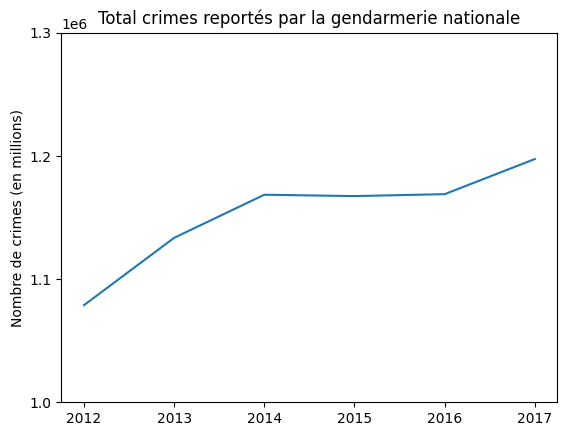

In [10]:
# Visualisation des données
fig, ax = plt.subplots()
ax.plot(anneeFrame.index, anneeFrame.values)
plt.yticks(np.arange(1000000, 1400000, 100000))
ax.set_title('Total crimes reportés par la gendarmerie nationale')
ax.set_ylabel('Nombre de crimes (en millions)')
plt.savefig('GendarmerieGraph.png', transparent=False)
plt.show()